In [1]:
# encoding: utf-8

In [2]:
import pandas as pd
import numpy as np

import h2o

from h2o.grid.grid_search import H2OGridSearch

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator


In [3]:
try:
    h2o.cluster().shutdown()
except AttributeError:
    pass
    
h2o.init(nthreads = -1,
         max_mem_size = "24G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.16.04.1-b11); OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /usr/local/lib/python2.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0_2ZXs
  JVM stdout: /tmp/tmp0_2ZXs/h2o_mourao_started_from_python.out
  JVM stderr: /tmp/tmp0_2ZXs/h2o_mourao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Sao_Paulo
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.4
H2O cluster version age:,2 months and 24 days
H2O cluster name:,H2O_from_python_mourao_8gb3yz
H2O cluster total nodes:,1
H2O cluster free memory:,21.33 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [4]:
# seed for reproducibility
my_seed = 1980

In [5]:
my_path = '../data/'

In [6]:
# read data
train = h2o.import_file(my_path + 'c5_e3_1_train_under.csv')
test = h2o.import_file(my_path + 'c5_e3_1_test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
# changing label to factor informs to H2O that the problem is solved by classification.
train['label'] = train['label'].asfactor()
test['label'] = test['label'].asfactor()

In [8]:
# list of features
features = train.columns
features.remove('label')

glm Grid Build progress: |████████████████████████████████████████████████| 100%
     alpha        model_ids                  f1
0    [1.0]  lr_grid_model_4  0.8336908354655905
1    [0.0]  lr_grid_model_0   0.833674409086258
2    [0.1]  lr_grid_model_1  0.8336460335359704
3    [0.7]  lr_grid_model_3  0.8336395911750855
4    [0.5]  lr_grid_model_2  0.8335680070773022


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.139116113193
RMSE: 0.37298272506
LogLoss: 0.440309575441
Null degrees of freedom: 2852460
Residual degrees of freedom: 2852446
Null deviance: 4206774.19191
Residual deviance: 2511931.78374
AIC: 2511961.78374
AUC: 0.892211476038
Gini: 0.784422952076
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.763769163125: 


,0,1,Error,Rate
0,2376269.0,180422.0,0.0706,(180422.0/2556691.0)
1,115626.0,180144.0,0.3909,(115626.0/295770.0)
Total,2491895.0,360566.0,0.1038,(296048.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7637692,0.5489383,81.0
max f2,0.5595585,0.6403228,145.0
max f0point5,0.8836668,0.5631339,42.0
max accuracy,0.9024617,0.9134281,36.0
max precision,0.9973179,0.9518878,0.0
max recall,0.0039819,1.0,399.0
max specificity,0.9973179,0.9999128,0.0
max absolute_mcc,0.7504149,0.4940981,85.0
max min_per_class_accuracy,0.5291523,0.8169862,155.0
max mean_per_class_accuracy,0.5183452,0.8174482,159.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9821048,7.8992733,7.8992733,0.8190710,0.8190710,0.0789938,0.0789938,689.9273274,689.9273274
,2,0.0200003,0.9668144,6.8613188,7.3802960,0.7114461,0.7652585,0.0686141,0.1476079,586.1318773,638.0296024
,3,0.0300001,0.9507530,6.2986099,7.0197424,0.6530991,0.7278730,0.0629848,0.2105927,529.8609863,601.9742397
,4,0.0400002,0.9336985,5.8777977,6.7342537,0.6094654,0.6982708,0.0587788,0.2693715,487.7797717,573.4253725
,5,0.0500003,0.9156843,5.3283918,6.4530794,0.5524978,0.6691160,0.0532846,0.3226561,432.8391833,545.3079375
,6,0.1000003,0.8169841,4.1576239,5.3053557,0.4311016,0.5501092,0.2078811,0.5305372,315.7623934,430.5355678
,7,0.1500003,0.7142143,2.7069692,4.4392289,0.2806840,0.4603010,0.1353484,0.6658857,170.6969201,343.9228877
,8,0.2000003,0.6152019,1.8020089,3.7799251,0.1868492,0.3919382,0.0901004,0.7559861,80.2008949,277.9925051
,9,0.3000002,0.4439582,1.0737063,2.8778532,0.1113320,0.2984029,0.1073706,0.8633567,7.3706297,187.7853187
,10,0.4000002,0.3139435,0.5665215,2.3000208,0.0587423,0.2384878,0.0566521,0.9200088,-43.3478518,130.0020767


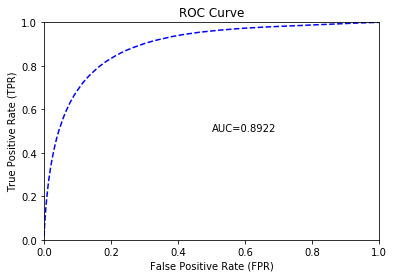

In [9]:
# Logistic Regression (LR)

# lambda value | alpha value       | Result
# -------------+-------------------+-------------------------------------
# lambda = 0   | alpha = any value | No regularization. alpha is ignored.
# lambda > 0   | alpha = 0         | Ridge Regression
# lambda > 0   | alpha = 1         | LASSO
# lambda > 0   | 0 < alpha < 1     | Elastic Net Penalty



hyper_parameters = { 'alpha': [0, 0.1, 0.5, 0.7, 1.0] }

lr_grid = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', 
                                                      seed=my_seed,
                                                      fold_assignment='Modulo',
                                                      lambda_search=True,
                                                      nfolds=5), 
                         grid_id='lr_grid',
                         hyper_params=hyper_parameters)

lr_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
lr_gridperf1 = lr_grid.get_grid(sort_by='F1', decreasing=True)
print(lr_gridperf1)

# Grab the top LR model, chosen by validation F1
best_lr1 = lr_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_lr_perf1 = best_lr1.model_performance(test)
print(best_lr_perf1)

best_lr_perf1.plot()

In [10]:
best_lr1.parms['lambda']['actual_value']

[0.26221219843782834,
 0.23891798941571324,
 0.21769317372159255,
 0.19835391215569426,
 0.18073269728607202,
 0.1646769025793638,
 0.15004746042277503,
 0.13671765758694548,
 0.12457203769657497,
 0.11350540120253387,
 0.10342189419369513,
 0.09423417815621177,
 0.08586267348909195,
 0.07823487022376537,
 0.07128469997742368,
 0.06495196370029512,
 0.05918181026027411,
 0.0539242613486553,
 0.049133778591932714,
 0.044768869120193636,
 0.04079172617572925,
 0.03716790164898581,
 0.03386600770551935,
 0.030857444919589406,
 0.028116154559614984,
 0.02561839287990787,
 0.02334252546370628,
 0.021268839836206605,
 0.01937937472453692,
 0.01765776448580391,
 0.016089097355723295,
 0.014659786290051267,
 0.013357451280107176,
 0.012170812123060825,
 0.01108959071821191,
 0.010104422042998712,
 0.00920677303765281,
 0.008388868695917508,
 0.007643624721663147,
 0.006964586168103082,
 0.006345871528132618,
 0.005782121791528127,
 0.005268454027764199,
 0.004800419092405378,
 0.00437396309074

drf Grid Build progress: |████████████████████████████████████████████████| 100%
     col_sample_rate_change_per_level col_sample_rate_per_tree max_depth  \
0                                 2.0                      1.0        20   
1                                 2.0                      1.0        20   
2                                 2.0                      1.0        20   
3                                 2.0                      1.0        20   
4                                 2.0                      0.5        20   
5                                 2.0                      0.5        20   
6                                 1.0                      1.0        20   
7                                 1.0                      1.0        20   
8                                 1.0                      1.0        20   
9                                 2.0                      0.5        20   
10                                1.0                      1.0        20   
11     

,0,1,Error,Rate
0,2407900.0,148791.0,0.0582,(148791.0/2556691.0)
1,110328.0,185442.0,0.373,(110328.0/295770.0)
Total,2518228.0,334233.0,0.0908,(259119.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7773902,0.5887020,76.0
max f2,0.5983203,0.6699629,133.0
max f0point5,0.8840230,0.6177962,42.0
max accuracy,0.8900354,0.9211947,40.0
max precision,0.9899953,0.9797486,0.0
max recall,0.0024392,1.0,399.0
max specificity,0.9899953,0.9999773,0.0
max absolute_mcc,0.7803931,0.5391850,75.0
max min_per_class_accuracy,0.5356098,0.8339948,153.0
max mean_per_class_accuracy,0.4809446,0.8356977,171.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9758034,8.7411321,8.7411321,0.9063628,0.9063628,0.0874125,0.0874125,774.1132136,774.1132136
,2,0.0200003,0.9594251,7.6920205,8.2165763,0.7975811,0.8519720,0.0769213,0.1643338,669.2020470,721.6576303
,3,0.0300018,0.9444871,7.0280288,7.8203568,0.7287322,0.8108882,0.0702911,0.2346249,602.8028828,682.0356776
,4,0.0400002,0.9271277,6.3738874,7.4587996,0.6609046,0.7733985,0.0637286,0.2983535,537.3887402,645.8799650
,5,0.0500003,0.9121082,5.7723118,7.1214997,0.5985276,0.7384241,0.0577239,0.3560774,477.2311788,612.1499712
,6,0.1000003,0.8162905,4.3532490,5.7373792,0.4513858,0.5949055,0.2176624,0.5737397,335.3248982,473.7379200
,7,0.1500003,0.7055557,2.6709953,4.7152536,0.2769539,0.4889219,0.1335497,0.7072894,167.0995290,371.5253619
,8,0.2000010,0.6029748,1.7393683,3.9712758,0.1803541,0.4117792,0.0869696,0.7942591,73.9368314,297.1275772
,9,0.3000002,0.4240917,1.0255680,2.9893812,0.1063405,0.3099672,0.1025560,0.8968151,2.5567952,198.9381197
,10,0.4000006,0.3056076,0.4749622,2.3607753,0.0492485,0.2447874,0.0474964,0.9443115,-52.5037844,136.0775335


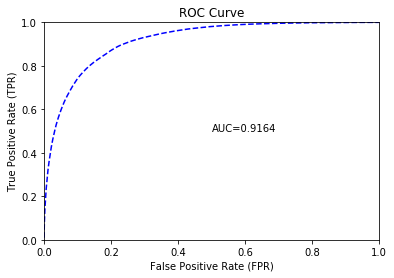

In [10]:
# Random Forest (RF)

hyper_par    = { 
                 'ntrees' :  [50, 100],
                 'mtries' : [-1],
                 'col_sample_rate_change_per_level' : [1, 2], # https://0xdata.atlassian.net/browse/PUBDEV-5334    
                 'max_depth' : [20],
                 'min_rows' : [5000, 50000],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [0.5, 1.],
                 'min_split_improvement' : [1e-4, 1e-5] 
               }

rf_grid = H2OGridSearch(H2ORandomForestEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                         grid_id='rf_grid',
                         hyper_params=hyper_par)

rf_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
rf_gridperf1 = rf_grid.get_grid(sort_by='F1', decreasing=True)
print(rf_gridperf1)

# Grab the top RF model, chosen by validation F1
best_rf = rf_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_rf_perf1 = best_rf.model_performance(test)
print(best_rf_perf1)

best_rf_perf1.plot()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree max_depth  \
0                                2.0                      1.0        20   
1                                2.0                      1.0        20   
2                                2.0                      1.0        20   
3                                2.0                      1.0        20   

  min_rows min_split_improvement mtries ntrees sample_rate  \
0   1000.0                1.0E-5     -1     25         1.0   
1   1000.0                1.0E-5     -1     75         1.0   
2   5000.0                1.0E-5     -1     75         1.0   
3   5000.0                1.0E-5     -1     25         1.0   

            model_ids                  f1  
0  rf_grid_01_model_0  0.8587146700468755  
1  rf_grid_01_model_2  0.8586556077572892  
2  rf_grid_01_model_3  0.8518546922272818  
3  rf_grid_01_model_1  0.8513917690085038  


ModelMetri

,0,1,Error,Rate
0,2408158.0,148533.0,0.0581,(148533.0/2556691.0)
1,104428.0,191342.0,0.3531,(104428.0/295770.0)
Total,2512586.0,339875.0,0.0887,(252961.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7871220,0.6020404,75.0
max f2,0.5947009,0.6847970,137.0
max f0point5,0.8991979,0.6301695,37.0
max accuracy,0.8937444,0.9229833,39.0
max precision,0.9976173,0.9944972,0.0
max recall,0.0012305,1.0,399.0
max specificity,0.9976173,0.9999914,0.0
max absolute_mcc,0.7871220,0.5540997,75.0
max min_per_class_accuracy,0.5501852,0.8447673,152.0
max mean_per_class_accuracy,0.5347942,0.8449967,157.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9818144,8.8909086,8.8909086,0.9218931,0.9218931,0.0889103,0.0889103,789.0908632,789.0908632
,2,0.0200013,0.9667624,7.8426626,8.3667581,0.8132011,0.8675442,0.0784359,0.1673462,684.2662626,736.6758069
,3,0.0300001,0.9533895,7.1182556,7.9506441,0.7380877,0.8243976,0.0711735,0.2385198,611.8255569,695.0644065
,4,0.0400002,0.9392606,6.4978657,7.5874463,0.6737599,0.7867378,0.0649795,0.3034993,549.7865650,658.7446278
,5,0.0500003,0.9231535,5.9220883,7.2543723,0.6140578,0.7522016,0.0592217,0.3627210,492.2088284,625.4372344
,6,0.1000003,0.8277136,4.4824711,5.8684266,0.4647848,0.6084937,0.2241235,0.5868445,348.2471058,486.8426560
,7,0.1500003,0.7147758,2.7797285,4.8388629,0.2882284,0.5017388,0.1389864,0.7258309,177.9728465,383.8862935
,8,0.2000003,0.6038175,1.7180924,4.0586717,0.1781480,0.4208413,0.0859046,0.8117355,71.8092363,305.8671659
,9,0.3000006,0.4126167,0.9626030,3.0266476,0.0998117,0.3138313,0.0962606,0.9079961,-3.7396958,202.6647581
,10,0.4000002,0.2762528,0.4569108,2.3842162,0.0473768,0.2472180,0.0456909,0.9536870,-54.3089153,138.4216213


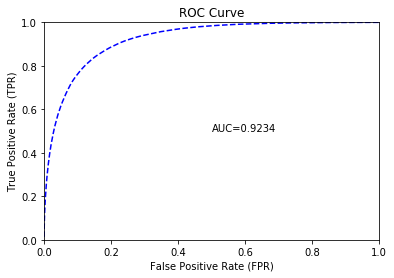

In [12]:
# Random Forest (RF) - Refinement 1

hyper_par    = { 
                 'ntrees' :  [25, 75],
                 'mtries' : [-1],
                 'col_sample_rate_change_per_level' : [2], # https://0xdata.atlassian.net/browse/PUBDEV-5334    
                 'max_depth' : [20],
                 'min_rows' : [1000, 5000],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5] 
               }

rf_grid = H2OGridSearch(H2ORandomForestEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                         grid_id='rf_grid_1',
                         hyper_params=hyper_par)

rf_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
rf_gridperf1 = rf_grid.get_grid(sort_by='F1', decreasing=True)
print(rf_gridperf1)

# Grab the top RF model, chosen by validation F1
best_rf = rf_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_rf_perf1 = best_rf.model_performance(test)
print(best_rf_perf1)

best_rf_perf1.plot()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree max_depth  \
0                                2.0                      1.0        20   
1                                2.0                      1.0        20   
2                                2.0                      1.0        20   
3                                2.0                      1.0        20   

  min_rows min_split_improvement mtries ntrees sample_rate          model_ids  \
0    100.0                1.0E-5     -1    150         1.0  rf_grid_2_model_2   
1    100.0                1.0E-5     -1      5         1.0  rf_grid_2_model_0   
2    500.0                1.0E-5     -1    150         1.0  rf_grid_2_model_3   
3    500.0                1.0E-5     -1      5         1.0  rf_grid_2_model_1   

                   f1  
0  0.8650900538156938  
1  0.8635399750319055  
2  0.8610982951394182  
3  0.8590479862854565  


ModelMetricsBin

,0,1,Error,Rate
0,2418046.0,138645.0,0.0542,(138645.0/2556691.0)
1,102530.0,193240.0,0.3467,(102530.0/295770.0)
Total,2520576.0,331885.0,0.0845,(241175.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8048833,0.6157523,73.0
max f2,0.6010837,0.6969207,136.0
max f0point5,0.9058552,0.6435242,38.0
max accuracy,0.9009886,0.9249788,40.0
max precision,0.9985675,0.9924849,0.0
max recall,0.0011179,1.0,399.0
max specificity,0.9985675,0.9999820,0.0
max absolute_mcc,0.8048833,0.5696187,73.0
max min_per_class_accuracy,0.5543030,0.8513982,152.0
max mean_per_class_accuracy,0.5274703,0.8526631,162.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9863620,8.9470326,8.9470326,0.9277125,0.9277125,0.0894715,0.0894715,794.7032556,794.7032556
,2,0.0200003,0.9729682,7.9969830,8.4720078,0.8292025,0.8784575,0.0799709,0.1694425,699.6982997,747.2007777
,3,0.0300001,0.9596707,7.2341541,8.0593995,0.7501052,0.8356744,0.0723400,0.2417825,623.4154094,705.9399526
,4,0.0400002,0.9463954,6.6256659,7.7009630,0.6870114,0.7985083,0.0662576,0.3080400,562.5665911,670.0962981
,5,0.0500003,0.9319017,6.1273125,7.3862307,0.6353374,0.7658739,0.0612740,0.3693140,512.7312513,638.6230681
,6,0.1000003,0.8382975,4.6112198,5.9987301,0.4781347,0.6220048,0.2305609,0.5998749,361.1219793,499.8730101
,7,0.1500003,0.7248480,2.7989326,4.9321334,0.2902197,0.5114100,0.1399466,0.7398215,179.8932583,393.2133421
,8,0.2000003,0.6021290,1.7302640,4.1316675,0.1794101,0.4284102,0.0865132,0.8263347,73.0263987,313.1667466
,9,0.3000002,0.3961763,0.9080708,3.0571365,0.0941573,0.3169927,0.0908070,0.9171417,-9.1929221,205.7136492
,10,0.4000002,0.2464875,0.4273254,2.3996843,0.0443091,0.2488219,0.0427325,0.9598742,-57.2674564,139.9684305


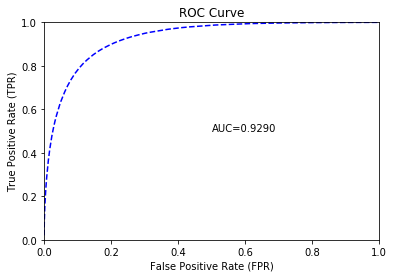

In [13]:
# Random Forest (RF) - Refinement 2

hyper_par    = { 
                 'ntrees' :  [5, 150],
                 'mtries' : [-1],
                 'col_sample_rate_change_per_level' : [2], # https://0xdata.atlassian.net/browse/PUBDEV-5334    
                 'max_depth' : [20],
                 'min_rows' : [100, 500],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5] 
               }

rf_grid = H2OGridSearch(H2ORandomForestEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                         grid_id='rf_grid_2',
                         hyper_params=hyper_par)

rf_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
rf_gridperf1 = rf_grid.get_grid(sort_by='F1', decreasing=True)
print(rf_gridperf1)

# Grab the top RF model, chosen by validation F1
best_rf = rf_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_rf_perf1 = best_rf.model_performance(test)
print(best_rf_perf1)

best_rf_perf1.plot()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree max_depth  \
0                                2.0                      1.0        20   
1                                2.0                      1.0        20   

  min_rows min_split_improvement mtries ntrees sample_rate          model_ids  \
0    100.0                1.0E-5     -1    200         1.0  rf_grid_3_model_1   
1    100.0                1.0E-5     -1    100         1.0  rf_grid_3_model_0   

                   f1  
0  0.8650070692719308  
1  0.8649941652096995  


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.117683980471
RMSE: 0.34305098815
LogLoss: 0.367124668479
Mean Per-Class Error: 0.147348557897
AUC: 0.92903135219
Gini: 0.85806270438
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.798429623592: 


,0,1,Error,Rate
0,2412325.0,144366.0,0.0565,(144366.0/2556691.0)
1,99876.0,195894.0,0.3377,(99876.0/295770.0)
Total,2512201.0,340260.0,0.0856,(244242.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7984296,0.6159898,75.0
max f2,0.6120431,0.6969765,134.0
max f0point5,0.9017274,0.6432335,40.0
max accuracy,0.8989898,0.9250156,41.0
max precision,0.9985997,0.9918395,0.0
max recall,0.0011111,1.0,399.0
max specificity,0.9985997,0.9999812,0.0
max absolute_mcc,0.7984296,0.5698370,75.0
max min_per_class_accuracy,0.5542862,0.8515839,153.0
max mean_per_class_accuracy,0.5290207,0.8526514,162.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9863682,8.9510897,8.9510897,0.9281332,0.9281332,0.0895121,0.0895121,795.1089708,795.1089708
,2,0.0200003,0.9729073,7.9895449,8.4703173,0.8284312,0.8782822,0.0798965,0.1694087,698.9544887,747.0317297
,3,0.0300001,0.9596818,7.2371971,8.0592868,0.7504207,0.8356627,0.0723704,0.2417791,623.7197064,705.9286826
,4,0.0400002,0.9464025,6.6449374,7.7056964,0.6890096,0.7989991,0.0664503,0.3082294,564.4937379,670.5696365
,5,0.0500003,0.9318948,6.1249458,7.3895440,0.6350920,0.7662175,0.0612503,0.3694797,512.4945841,638.9544044
,6,0.1000003,0.8382192,4.6087178,5.9991358,0.4778752,0.6220469,0.2304358,0.5999155,360.8717848,499.9135820
,7,0.1500003,0.7246860,2.8029898,4.9337563,0.2906404,0.5115783,0.1401494,0.7400649,180.2989792,393.3756301
,8,0.2000003,0.6019355,1.7262068,4.1318703,0.1789894,0.4284312,0.0863103,0.8263752,72.6206779,313.1870326
,9,0.3000002,0.3961459,0.9085441,3.0574295,0.0942064,0.3170231,0.0908544,0.9172296,-9.1455881,205.7429513
,10,0.4000002,0.2466236,0.4265478,2.3997097,0.0442285,0.2488245,0.0426548,0.9598844,-57.3452195,139.9709662


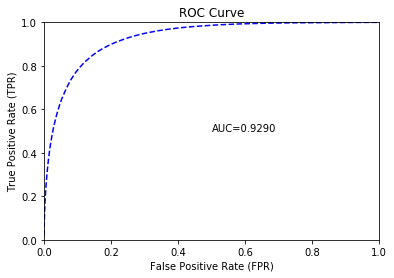

In [14]:
# Random Forest (RF) - Refinement 3

hyper_par    = { 
                 'ntrees' :  [100, 200],
                 'mtries' : [-1],
                 'col_sample_rate_change_per_level' : [2], # https://0xdata.atlassian.net/browse/PUBDEV-5334    
                 'max_depth' : [20],
                 'min_rows' : [100],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5] 
               }

rf_grid = H2OGridSearch(H2ORandomForestEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                         grid_id='rf_grid_3',
                         hyper_params=hyper_par)

rf_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
rf_gridperf1 = rf_grid.get_grid(sort_by='F1', decreasing=True)
print(rf_gridperf1)

# Grab the top RF model, chosen by validation F1
best_rf = rf_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_rf_perf1 = best_rf.model_performance(test)
print(best_rf_perf1)

best_rf_perf1.plot()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree max_depth  \
0                                2.0                      1.0        20   

  min_rows min_split_improvement mtries ntrees sample_rate          model_ids  \
0    100.0                1.0E-5     -1    100         1.0  rf_grid_4_model_0   

                   f1  
0  0.8649941652096995  


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.117748953251
RMSE: 0.343145673513
LogLoss: 0.367285454113
Mean Per-Class Error: 0.147367250732
AUC: 0.92895581373
Gini: 0.85791162746
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.800879182449: 


,0,1,Error,Rate
0,2414171.0,142520.0,0.0557,(142520.0/2556691.0)
1,100816.0,194954.0,0.3409,(100816.0/295770.0)
Total,2514987.0,337474.0,0.0853,(243336.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8008792,0.6157311,76.0
max f2,0.6076462,0.6967873,136.0
max f0point5,0.9073636,0.6430176,39.0
max accuracy,0.8995082,0.9249399,42.0
max precision,0.9986454,0.9919905,0.0
max recall,0.0010791,1.0,399.0
max specificity,0.9986454,0.9999816,0.0
max absolute_mcc,0.8122465,0.5696101,73.0
max min_per_class_accuracy,0.5547125,0.8516860,152.0
max mean_per_class_accuracy,0.5260949,0.8526327,161.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9864035,8.9534564,8.9534564,0.9283786,0.9283786,0.0895358,0.0895358,795.3456379,795.3456379
,2,0.0200003,0.9730440,7.9963068,8.4748816,0.8291323,0.8787555,0.0799642,0.1694999,699.6306805,747.4881592
,3,0.0300001,0.9597318,7.2419306,8.0639075,0.7509115,0.8361418,0.0724178,0.2419177,624.1930573,706.3907525
,4,0.0400002,0.9464995,6.5992944,7.6977510,0.6842770,0.7981753,0.0659938,0.3079116,559.9294429,669.7751042
,5,0.0500003,0.9319162,6.1225792,7.3827145,0.6348466,0.7655093,0.0612266,0.3691382,512.2579170,638.2714458
,6,0.1000003,0.8383967,4.6148713,5.9987977,0.4785133,0.6220118,0.2307435,0.5998817,361.4871280,499.8797721
,7,0.1500003,0.7250155,2.8016374,4.9330801,0.2905001,0.5115082,0.1400818,0.7399635,180.1637389,393.3080101
,8,0.2000003,0.6022390,1.7255306,4.1311941,0.1789192,0.4283611,0.0862765,0.8262400,72.5530578,313.1194126
,9,0.3000002,0.3962061,0.9102008,3.0575309,0.0943782,0.3170336,0.0910200,0.9172600,-8.9799187,205.7530943
,10,0.4000002,0.2464924,0.4257702,2.3995913,0.0441479,0.2488122,0.0425770,0.9598370,-57.4229827,139.9591327


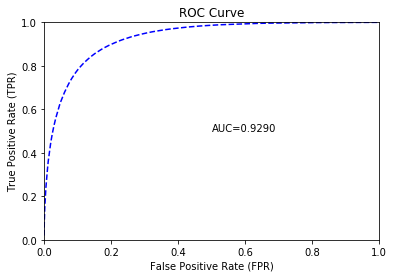

In [15]:
# Random Forest (RF) - Refinement 4

hyper_par    = { 
                 'ntrees' :  [100],
                 'mtries' : [-1],
                 'col_sample_rate_change_per_level' : [2], # https://0xdata.atlassian.net/browse/PUBDEV-5334    
                 'max_depth' : [20],
                 'min_rows' : [100],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5] 
               }

rf_grid = H2OGridSearch(H2ORandomForestEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                         grid_id='rf_grid_4',
                         hyper_params=hyper_par)

rf_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
rf_gridperf1 = rf_grid.get_grid(sort_by='F1', decreasing=True)
print(rf_gridperf1)

# Grab the top RF model, chosen by validation F1
best_rf = rf_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_rf_perf1 = best_rf.model_performance(test)
print(best_rf_perf1)

best_rf_perf1.plot()

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
                  activation              epochs        hidden  \
0                     Maxout   9.684320013738335  [10, 10, 10]   
1                     Maxout   5.047362379488726  [10, 10, 10]   
2                     Maxout   9.990109538238874      [10, 10]   
3                       Tanh   9.729919246683457      [10, 10]   
4                       Tanh   9.714774310211164  [10, 10, 10]   
5                     Maxout   5.047362379488726  [10, 10, 10]   
6                       Tanh   9.959603620425785  [10, 10, 10]   
7                       Tanh     9.7761973958481      [10, 10]   
8                     Maxout   5.047362379488726      [10, 10]   
9                  Rectifier  10.020711051126526      [10, 10]   
10                      Tanh   5.047362379488726  [10, 10, 10]   
11                    Maxout   5.047362379488726      [10, 10]   
12                    Maxout    9.66883197879627  [10, 10, 10

,0,1,Error,Rate
0,2367084.0,189607.0,0.0742,(189607.0/2556691.0)
1,105814.0,189956.0,0.3578,(105814.0/295770.0)
Total,2472898.0,379563.0,0.1036,(295421.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9723537,0.5625551,19.0
max f2,0.9199156,0.6626868,46.0
max f0point5,0.9907689,0.5651905,7.0
max accuracy,0.9937083,0.9130905,5.0
max precision,0.9996874,0.7734534,0.0
max recall,0.0173443,1.0,399.0
max specificity,0.9996874,0.9957289,0.0
max absolute_mcc,0.9723537,0.5098959,19.0
max min_per_class_accuracy,0.9119615,0.8316953,49.0
max mean_per_class_accuracy,0.8962284,0.8331154,55.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9997392,7.7339444,7.7339444,0.8019281,0.8019281,0.0773405,0.0773405,673.3944365,673.3944365
,2,0.0200003,0.9988176,6.8031663,7.2685553,0.7054163,0.7536722,0.0680326,0.1453731,580.3166274,626.8555319
,3,0.0300001,0.9975662,6.2874523,6.9415286,0.6519422,0.7197630,0.0628732,0.2082463,528.7452306,594.1528625
,4,0.0400002,0.9960911,5.8311405,6.6639292,0.6046275,0.6909789,0.0583122,0.2665585,483.1140479,566.3929155
,5,0.0500003,0.9944246,5.4129158,6.4137247,0.5612621,0.6650353,0.0541299,0.3206884,441.2915816,541.3724733
,6,0.1000003,0.9829503,4.3738731,5.3938025,0.4535243,0.5592802,0.2186936,0.5393820,337.3873123,439.3802504
,7,0.1500003,0.9652822,2.9191612,4.5689240,0.3026861,0.4737490,0.1459580,0.6853400,191.9161182,356.8923991
,8,0.2000003,0.9383012,1.9395483,3.9115812,0.2011106,0.4055896,0.0969774,0.7823173,93.9548301,291.1581221
,9,0.3000002,0.8467081,1.0723877,2.9651845,0.1111952,0.3074582,0.1072387,0.8895561,7.2387704,196.5184488
,10,0.4000002,0.7148578,0.5023500,2.3494764,0.0520884,0.2436158,0.0502350,0.9397911,-49.7650025,134.9476399


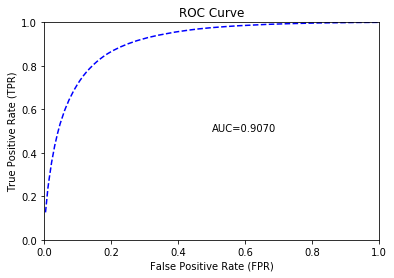

In [17]:
# Deep Learning (DL)

hyper_parameters = {
                    'activation': ['tanh', 'tanh_with_dropout', 'rectifier', 
                                   'rectifier_with_dropout', 'maxout', 'maxout_with_dropout'],
                    'epochs' : [5, 10],
                    'hidden' : [[10, 10], [10, 10, 10]],
                    'input_dropout_ratio' : [.1, .2],
                    'l1' : [.0, .5],
                    'l2' : [.0, .5]
                   }

dl_grid = H2OGridSearch(H2ODeepLearningEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                        grid_id='dl_grid',
                        hyper_params=hyper_parameters)

dl_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
dl_gridperf1 = dl_grid.get_grid(sort_by='F1', decreasing=True)
print(dl_gridperf1)

# Grab the top DL model, chosen by validation F1
best_dl = dl_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_dl_perf1 = best_dl.model_performance(test)
print(best_dl_perf1)

best_dl_perf1.plot()

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
    activation              epochs        hidden input_dropout_ratio   l1  \
0       Maxout   6.578244759625069  [20, 20, 20]                0.15  0.0   
1       Maxout  10.877014918054012  [10, 10, 10]                0.15  0.0   
2       Maxout    8.93374350312998  [20, 20, 20]                0.15  0.0   
3       Maxout   9.729796311417573  [10, 10, 10]                0.15  0.0   

    l2          model_ids                  f1  
0  0.0  dl_grid_1_model_2  0.8497749463333565  
1  0.0  dl_grid_1_model_1  0.8440251658816653  
2  0.0  dl_grid_1_model_3  0.8412782316194137  
3  0.0  dl_grid_1_model_0  0.8337658107594592  


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.496467894302
RMSE: 0.704604778796
LogLoss: 1.51437145592
Mean Per-Class Error: 0.167901226736
AUC: 0.908552816115
Gini: 0.81710563223
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.975173492916: 


,0,1,Error,Rate
0,2386853.0,169838.0,0.0664,(169838.0/2556691.0)
1,108851.0,186919.0,0.368,(108851.0/295770.0)
Total,2495704.0,356757.0,0.0977,(278689.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9751735,0.5729081,20.0
max f2,0.9458550,0.6636972,41.0
max f0point5,0.9880237,0.5902272,10.0
max accuracy,0.9905613,0.9171764,8.0
max precision,0.9995777,0.8364372,0.0
max recall,0.0176594,1.0,399.0
max specificity,0.9995777,0.9978668,0.0
max absolute_mcc,0.9751735,0.5211957,20.0
max min_per_class_accuracy,0.9363046,0.8314197,47.0
max mean_per_class_accuracy,0.9343458,0.8320988,48.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9992537,8.1464214,8.1464214,0.8446976,0.8446976,0.0814653,0.0814653,714.6421398,714.6421398
,2,0.0200003,0.9976764,6.9461809,7.5463011,0.7202454,0.7824715,0.0694628,0.1509281,594.6180851,654.6301125
,3,0.0300001,0.9961350,6.8226769,7.3050987,0.7074393,0.7574614,0.0682253,0.2191534,582.2676924,630.5098695
,4,0.0400002,0.9945469,6.3261129,7.0603501,0.6559509,0.7320835,0.0632620,0.2824154,532.6112919,606.0350106
,5,0.0500003,0.9927136,5.6823783,6.7847538,0.5892025,0.7035071,0.0568246,0.3392399,468.2378271,578.4753807
,6,0.1000003,0.9813972,4.3142322,5.5494973,0.4473402,0.5754241,0.2157115,0.5549515,331.4232165,454.9497316
,7,0.1500003,0.9672837,2.7924411,4.6304807,0.2895466,0.4801318,0.1396220,0.6945735,179.2441051,363.0480709
,8,0.2000003,0.9500981,1.8162092,3.9269141,0.1883217,0.4071794,0.0908104,0.7853839,81.6209177,292.6914059
,9,0.3000002,0.9057592,1.0087572,2.9541962,0.1045974,0.3063189,0.1008757,0.8862596,0.8757158,195.4196229
,10,0.4000002,0.8486739,0.5063396,2.3422326,0.0525021,0.2428647,0.0506339,0.9368935,-49.3660437,134.2232599


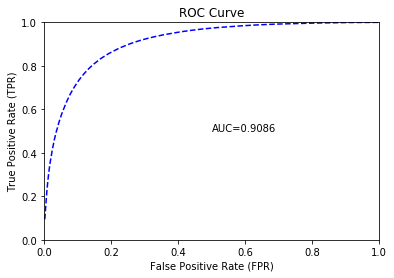

In [18]:
# Deep Learning (DL) - Refinement 1

hyper_parameters = {
                    'activation': ['maxout'],
                    'epochs' : [10, 20],
                    'hidden' : [[10, 10, 10], [20, 20, 20]],
                    'input_dropout_ratio' : [.15],
                    'l1' : [.0],
                    'l2' : [.0]
                   }

dl_grid = H2OGridSearch(H2ODeepLearningEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                        grid_id='dl_grid_1',
                        hyper_params=hyper_parameters)

dl_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
dl_gridperf1 = dl_grid.get_grid(sort_by='F1', decreasing=True)
print(dl_gridperf1)

# Grab the top DL model, chosen by validation F1
best_dl = dl_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_dl_perf1 = best_dl.model_performance(test)
print(best_dl_perf1)

best_dl_perf1.plot()

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
    activation             epochs            hidden input_dropout_ratio   l1  \
0       Maxout  8.046503862473552  [20, 20, 20, 20]                0.15  0.0   

    l2          model_ids                  f1  
0  0.0  dl_grid_2_model_0  0.8454188432615677  


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.882965643528
RMSE: 0.939662515762
LogLoss: 5.15628654306
Mean Per-Class Error: 0.270030376379
AUC: 0.793871300441
Gini: 0.587742600883
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999778278484: 


,0,1,Error,Rate
0,2429179.0,127512.0,0.0499,(127512.0/2556691.0)
1,168370.0,127400.0,0.5693,(168370.0/295770.0)
Total,2597549.0,254912.0,0.1037,(295882.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9997783,0.4626990,3.0
max f2,0.9989715,0.5164229,13.0
max f0point5,0.9999268,0.5192885,1.0
max accuracy,0.9999867,0.9087714,0.0
max precision,0.9999867,0.6580099,0.0
max recall,0.6223358,1.0,374.0
max specificity,0.9999867,0.9849552,0.0
max absolute_mcc,0.9998585,0.4100196,2.0
max min_per_class_accuracy,0.9983144,0.7193833,21.0
max mean_per_class_accuracy,0.9989715,0.7299696,13.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9999994,7.9493115,7.9493115,0.8242594,0.8242594,0.0794942,0.0794942,694.9311471,694.9311471
,2,0.0200003,0.9999944,6.3724321,7.1608718,0.6607537,0.7425066,0.0637252,0.1432194,537.2432061,616.0871766
,3,0.0300001,0.9999800,5.8506171,6.7241304,0.6066470,0.6972211,0.0585049,0.2017243,485.0617052,572.4130402
,4,0.0400002,0.9999548,5.3824872,6.3887167,0.5581069,0.6624423,0.0538256,0.2555499,438.2487182,538.8716658
,5,0.0500003,0.9999190,4.8374765,6.0784665,0.5015951,0.6302726,0.0483754,0.3039253,383.7476545,507.8466460
,6,0.1000003,0.9996824,3.0295849,4.5540310,0.3141359,0.4722048,0.1514792,0.4554045,202.9584860,355.4031004
,7,0.1500003,0.9994061,1.7452757,3.6177814,0.1809666,0.3751256,0.0872638,0.5426683,74.5275657,261.7781410
,8,0.2000003,0.9990927,1.3498331,3.0507953,0.1399634,0.3163352,0.0674916,0.6101599,34.9833113,205.0795330
,9,0.3000002,0.9984154,0.9519224,2.3511718,0.0987043,0.2437916,0.0951922,0.7053521,-4.8077565,135.1171849
,10,0.4000002,0.9976547,0.6731584,1.9316689,0.0697994,0.2002936,0.0673158,0.7726680,-32.6841567,93.1668863


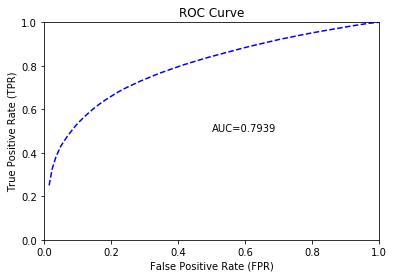

In [19]:
# Deep Learning (DL) - Refinement 2

hyper_parameters = {
                    'activation': ['maxout'],
                    'epochs' : [10],
                    'hidden' : [[20, 20, 20, 20]],
                    'input_dropout_ratio' : [.15],
                    'l1' : [.0],
                    'l2' : [.0]
                   }

dl_grid = H2OGridSearch(H2ODeepLearningEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                        grid_id='dl_grid_2',
                        hyper_params=hyper_parameters)

dl_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
dl_gridperf1 = dl_grid.get_grid(sort_by='F1', decreasing=True)
print(dl_gridperf1)

# Grab the top DL model, chosen by validation F1
best_dl = dl_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_dl_perf1 = best_dl.model_performance(test)
print(best_dl_perf1)

best_dl_perf1.plot()

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
    activation             epochs        hidden input_dropout_ratio   l1   l2  \
0       Maxout  3.786295882534578  [50, 50, 50]                0.15  0.0  0.0   

           model_ids                  f1  
0  dl_grid_3_model_0  0.8162808858984543  


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0723090219179
RMSE: 0.268903369108
LogLoss: 0.232614006636
Mean Per-Class Error: 0.178514955974
AUC: 0.882787718412
Gini: 0.765575436825
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.267048279229: 


,0,1,Error,Rate
0,2210149.0,346542.0,0.1355,(346542.0/2556691.0)
1,87964.0,207806.0,0.2974,(87964.0/295770.0)
Total,2298113.0,554348.0,0.1523,(434506.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2670483,0.4888874,202.0
max f2,0.1658864,0.6378151,257.0
max f0point5,0.3667579,0.4330476,149.0
max accuracy,0.6279118,0.8971502,37.0
max precision,0.7804290,0.6954887,3.0
max recall,0.0001170,1.0,399.0
max specificity,0.8236042,0.9999984,0.0
max absolute_mcc,0.2172235,0.4433887,228.0
max min_per_class_accuracy,0.1941380,0.8137295,241.0
max mean_per_class_accuracy,0.1377103,0.8214850,274.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.6254813,5.2229059,5.2229059,0.5415600,0.5415600,0.0522298,0.0522298,422.2905904,422.2905904
,2,0.0200003,0.5741918,4.5967522,4.9098291,0.4766345,0.5090973,0.0459682,0.0981979,359.6752244,390.9829074
,3,0.0300001,0.5376905,4.3977679,4.7391460,0.4560020,0.4913993,0.0439767,0.1421747,339.7767915,373.9146010
,4,0.0400002,0.5092591,4.2143657,4.6079498,0.4369851,0.4777956,0.0421442,0.1843189,321.4365749,360.7949795
,5,0.0500003,0.4851396,4.1565513,4.5176695,0.4309904,0.4684345,0.0415661,0.2258850,315.6551345,351.7669472
,6,0.1000003,0.3967617,3.8360226,4.1768472,0.3977549,0.4330948,0.1918011,0.4176860,283.6022578,317.6847220
,7,0.1500003,0.3258544,3.3084503,3.8873823,0.3430513,0.4030804,0.1654225,0.5831085,230.8450293,288.7382254
,8,0.2000003,0.2589413,2.6555779,3.5794317,0.2753553,0.3711492,0.1327788,0.7158873,165.5577900,257.9431705
,9,0.3000002,0.1376619,1.6042539,2.9210399,0.1663441,0.3028809,0.1604253,0.8763127,60.4253867,192.1039862
,10,0.4000002,0.0622171,0.6426618,2.3514458,0.0666372,0.2438200,0.0642662,0.9405788,-35.7338247,135.1445834


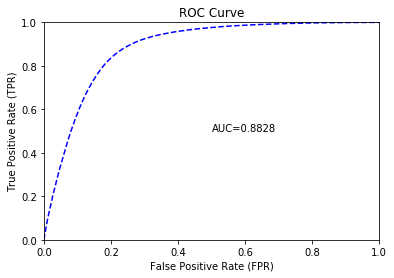

In [20]:
# Deep Learning (DL) - Refinement 3

hyper_parameters = {
                    'activation': ['maxout'],
                    'epochs' : [10],
                    'hidden' : [[50, 50, 50]],
                    'input_dropout_ratio' : [.15],
                    'l1' : [.0],
                    'l2' : [.0]
                   }

dl_grid = H2OGridSearch(H2ODeepLearningEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                        grid_id='dl_grid_3',
                        hyper_params=hyper_parameters)

dl_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
dl_gridperf1 = dl_grid.get_grid(sort_by='F1', decreasing=True)
print(dl_gridperf1)

# Grab the top DL model, chosen by validation F1
best_dl = dl_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_dl_perf1 = best_dl.model_performance(test)
print(best_dl_perf1)

best_dl_perf1.plot()

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
    activation             epochs        hidden input_dropout_ratio   l1   l2  \
0       Maxout  7.755731255145534  [20, 20, 20]                0.15  0.0  0.0   

           model_ids                  f1  
0  dl_grid_4_model_0  0.8202036987107886  


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.350562890297
RMSE: 0.592083516319
LogLoss: 1.26376979734
Mean Per-Class Error: 0.165149270573
AUC: 0.910785413081
Gini: 0.821570826163
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.986395138931: 


,0,1,Error,Rate
0,2382598.0,174093.0,0.0681,(174093.0/2556691.0)
1,104496.0,191274.0,0.3533,(104496.0/295770.0)
Total,2487094.0,365367.0,0.0977,(278589.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9863951,0.5786214,13.0
max f2,0.9390859,0.6680438,39.0
max f0point5,0.9967278,0.5851177,4.0
max accuracy,0.9981868,0.9158625,2.0
max precision,0.9998011,0.7053786,0.0
max recall,0.0776607,1.0,396.0
max specificity,0.9998011,0.9862881,0.0
max absolute_mcc,0.9863951,0.5278225,13.0
max min_per_class_accuracy,0.9244193,0.8345877,46.0
max mean_per_class_accuracy,0.9160069,0.8348507,50.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9999869,7.9533686,7.9533686,0.8246801,0.8246801,0.0795348,0.0795348,695.3368622,695.3368622
,2,0.0200003,0.9999084,6.9928381,7.4731034,0.7250833,0.7748817,0.0699293,0.1494641,599.2838090,647.3103356
,3,0.0300001,0.9997411,6.4000422,7.1154247,0.6636166,0.7377942,0.0639991,0.2134632,540.0042197,611.5424663
,4,0.0400002,0.9994571,6.0018789,6.8370358,0.6223313,0.7089282,0.0600196,0.2734828,500.1878923,583.7035788
,5,0.0500003,0.9990158,5.6786592,6.6053588,0.5888168,0.6849058,0.0567874,0.3302701,467.8659215,560.5358849
,6,0.1000003,0.9930645,4.5401510,5.5727586,0.4707656,0.5778361,0.2270075,0.5572776,354.0151032,457.2758561
,7,0.1500003,0.9769572,2.8860949,4.6772061,0.2992575,0.4849767,0.1443047,0.7015823,188.6094936,367.7206112
,8,0.2000003,0.9490269,1.7920012,3.9559061,0.1858115,0.4101856,0.0896000,0.7911823,79.2001169,295.5906141
,9,0.3000002,0.8598310,0.9979041,2.9699066,0.1034721,0.3079479,0.0997904,0.8909727,-0.2095874,196.9906622
,10,0.4000002,0.7194460,0.5137778,2.3558749,0.0532733,0.2442793,0.0513778,0.9423505,-48.6222222,135.5874949


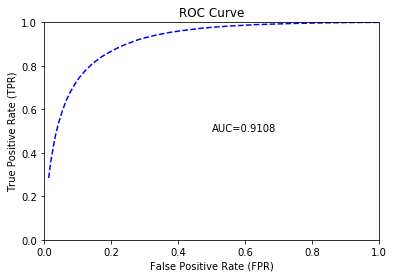

In [22]:
# Deep Learning (DL) - Final

hyper_parameters = {
                    'activation': ['maxout'],
                    'epochs' : [10],
                    'hidden' : [[20, 20, 20]],
                    'input_dropout_ratio' : [.15],
                    'l1' : [.0],
                    'l2' : [.0]
                   }

dl_grid = H2OGridSearch(H2ODeepLearningEstimator(seed=my_seed, 
                                                 nfolds=5, 
                                                 fold_assignment='Modulo'), 
                        grid_id='dl_grid_4',
                        hyper_params=hyper_parameters)

dl_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
dl_gridperf1 = dl_grid.get_grid(sort_by='F1', decreasing=True)
print(dl_gridperf1)

# Grab the top DL model, chosen by validation F1
best_dl = dl_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_dl_perf1 = best_dl.model_performance(test)
print(best_dl_perf1)

best_dl_perf1.plot()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
       col_sample_rate_change_per_level col_sample_rate_per_tree learn_rate  \
0                                   2.0                      1.0        0.5   
1                                   1.0                      1.0        0.5   
2                                   2.0                      1.0        0.5   
3                                   1.0                      1.0        0.5   
4                                   2.0                      1.0        0.5   
5                                   1.0                      1.0        0.5   
6                                   1.0                      1.0        0.5   
7                                   2.0                      1.0        0.5   
8                                   2.0                      1.0        0.5   
9                                   1.0                      1.0        0.5   
10                                  2.0           

,0,1,Error,Rate
0,2410771.0,145920.0,0.0571,(145920.0/2556691.0)
1,95736.0,200034.0,0.3237,(95736.0/295770.0)
Total,2506507.0,345954.0,0.0847,(241656.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8132254,0.6234269,71.0
max f2,0.6119674,0.7043449,136.0
max f0point5,0.9113911,0.6484966,37.0
max accuracy,0.9083879,0.9258581,38.0
max precision,0.9941386,0.9875381,0.0
max recall,0.0055820,1.0,399.0
max specificity,0.9941386,0.9999808,0.0
max absolute_mcc,0.8132254,0.5782733,71.0
max min_per_class_accuracy,0.5644079,0.8561477,151.0
max mean_per_class_accuracy,0.5366653,0.8570205,160.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9825021,8.9280992,8.9280992,0.9257493,0.9257493,0.0892822,0.0892822,792.8099184,792.8099184
,2,0.0200003,0.9721553,8.1017927,8.5149460,0.8400701,0.8829097,0.0810190,0.1703012,710.1792735,751.4945960
,3,0.0300001,0.9615820,7.2950135,8.1083113,0.7564156,0.8407460,0.0729486,0.2432498,629.5013495,710.8311309
,4,0.0400002,0.9503375,6.7054566,7.7575945,0.6952848,0.8043804,0.0670555,0.3103053,570.5456550,675.7594545
,5,0.0500003,0.9382165,6.1584173,7.4377569,0.6385627,0.7712166,0.0615850,0.3718903,515.8417338,643.7756861
,6,0.1000003,0.8566485,4.6962859,6.0670262,0.4869551,0.6290864,0.2348142,0.6067045,369.6285921,506.7026197
,7,0.1500003,0.7431632,2.8353798,4.9898133,0.2939989,0.5173908,0.1417689,0.7484735,183.5379836,398.9813261
,8,0.2000003,0.6107549,1.7331040,4.1756374,0.1797045,0.4329694,0.0866552,0.8351286,73.3104033,317.5637381
,9,0.3000002,0.3675631,0.8921462,3.0811416,0.0925061,0.3194818,0.0892146,0.9243432,-10.7853763,208.1141612
,10,0.4000002,0.2064543,0.3887820,2.4080523,0.0403126,0.2496895,0.0388782,0.9632214,-61.1218040,140.8052289


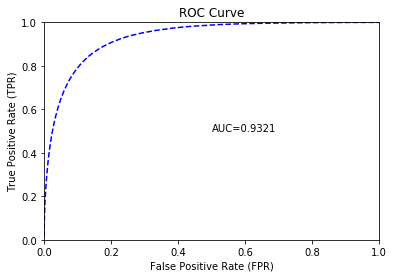

In [10]:
# Gradient Boosting Machine (GBM)

# GBM hyperparameters
hyper_par    = { 
                 'ntrees' :  [5, 10],
                 'learn_rate' : [0.5, 1.],
                 'max_depth' : [20],
                 'sample_rate' : [0.6320000291, 1.],
                 'col_sample_rate_per_tree' : [0.5, 1.],
                 'min_split_improvement' : [1e-4, 1e-5],
                 'col_sample_rate_change_per_level' : [1, 2],
                 'min_rows' : [500, 1000]
               }

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(seed=my_seed, 
                                                            nfolds=5,
                                                            fold_assignment='Modulo'),
                          grid_id='gbm_grid_',
                          hyper_params=hyper_par)
gbm_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
gbm_gridperf1 = gbm_grid.get_grid(sort_by='F1', decreasing=True)
print(gbm_gridperf1)

# Grab the top GBM model, chosen by validation F1
best_gbm = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm.model_performance(test)
print(best_gbm_perf1)

best_gbm_perf1.plot()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree learn_rate  \
0                                1.5                      1.0        0.5   
1                                2.0                      1.0        0.5   
2                                1.5                      1.0        0.5   
3                                2.0                      1.0        0.5   
4                                1.5                      1.0        0.5   
5                                2.0                      1.0        0.5   
6                                2.0                      1.0        0.5   
7                                1.5                      1.0        0.5   

  max_depth min_rows min_split_improvement ntrees sample_rate  \
0        20    500.0                1.0E-5     20         1.0   
1        20    500.0                1.0E-5     20         1.0   
2        20    500.0                1.0

,0,1,Error,Rate
0,2421430.0,135261.0,0.0529,(135261.0/2556691.0)
1,100193.0,195577.0,0.3388,(100193.0/295770.0)
Total,2521623.0,330838.0,0.0825,(235454.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8274145,0.6242404,68.0
max f2,0.6147445,0.7053589,137.0
max f0point5,0.9139799,0.6490282,37.0
max accuracy,0.9111284,0.9259822,38.0
max precision,0.9963023,0.9886095,0.0
max recall,0.0037820,1.0,399.0
max specificity,0.9963023,0.9999793,0.0
max absolute_mcc,0.8301056,0.5791911,67.0
max min_per_class_accuracy,0.5669180,0.8569429,151.0
max mean_per_class_accuracy,0.5171780,0.8578403,166.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9856276,8.9291135,8.9291135,0.9258545,0.9258545,0.0892924,0.0892924,792.9113472,792.9113472
,2,0.0200003,0.9756310,8.0902975,8.5097055,0.8388782,0.8823663,0.0809041,0.1701964,709.0297474,750.9705473
,3,0.0300001,0.9651598,7.3078616,8.1091002,0.7577479,0.8408278,0.0730771,0.2432735,630.7861590,710.9100208
,4,0.0400002,0.9540144,6.7091756,7.7591160,0.6956705,0.8045382,0.0670927,0.3103662,570.9175606,675.9115990
,5,0.0500003,0.9417711,6.1672078,7.4407321,0.6394741,0.7715251,0.0616729,0.3720391,516.7207832,644.0732126
,6,0.1000003,0.8598304,4.7098099,6.0752758,0.4883574,0.6299418,0.2354904,0.6075295,370.9809948,507.5275824
,7,0.1500003,0.7452376,2.8303759,4.9936451,0.2934800,0.5177881,0.1415187,0.7490482,183.0375946,399.3645059
,8,0.2000003,0.6106378,1.7461547,4.1817739,0.1810578,0.4336057,0.0873077,0.8363560,74.6154718,318.1773897
,9,0.3000002,0.3634843,0.8894752,3.0843423,0.0922292,0.3198136,0.0889475,0.9253034,-11.0524758,208.4342294
,10,0.4000002,0.2009794,0.3866857,2.4099287,0.0400952,0.2498841,0.0386686,0.9639720,-61.3314264,140.9928746


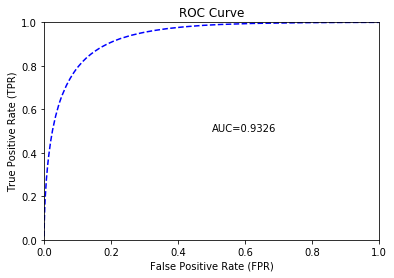

In [11]:
# Gradient Boosting Machine (GBM) - Refinement 1

# GBM hyperparameters
hyper_par    = { 
                 'ntrees' :  [10, 20],
                 'learn_rate' : [0.5],
                 'max_depth' : [20],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5],
                 'col_sample_rate_change_per_level' : [1.5, 2],
                 'min_rows' : [100, 500]
               }

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(seed=my_seed, 
                                                            nfolds=5,
                                                            fold_assignment='Modulo'),
                          grid_id='gbm_grid_1',
                          hyper_params=hyper_par)
gbm_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
gbm_gridperf1 = gbm_grid.get_grid(sort_by='F1', decreasing=True)
print(gbm_gridperf1)

# Grab the top GBM model, chosen by validation F1
best_gbm = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm.model_performance(test)
print(best_gbm_perf1)

best_gbm_perf1.plot()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree learn_rate  \
0                                2.0                      1.0        0.5   
1                                2.0                      1.0        0.5   
2                                1.7                      1.0        0.5   
3                                1.7                      1.0        0.5   

  max_depth min_rows min_split_improvement ntrees sample_rate  \
0        20    500.0                1.0E-5     30         1.0   
1        20    500.0                1.0E-5     20         1.0   
2        20    500.0                1.0E-5     20         1.0   
3        20    500.0                1.0E-5     30         1.0   

            model_ids                  f1  
0  gbm_grid_2_model_3  0.8696212141188748  
1  gbm_grid_2_model_1  0.8696212141188748  
2  gbm_grid_2_model_0  0.8696212141188748  
3  gbm_grid_2_model_2  0.86962121411

,0,1,Error,Rate
0,2421430.0,135261.0,0.0529,(135261.0/2556691.0)
1,100193.0,195577.0,0.3388,(100193.0/295770.0)
Total,2521623.0,330838.0,0.0825,(235454.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8274145,0.6242404,68.0
max f2,0.6147445,0.7053589,137.0
max f0point5,0.9139799,0.6490282,37.0
max accuracy,0.9111284,0.9259822,38.0
max precision,0.9963023,0.9886095,0.0
max recall,0.0037820,1.0,399.0
max specificity,0.9963023,0.9999793,0.0
max absolute_mcc,0.8301056,0.5791911,67.0
max min_per_class_accuracy,0.5669180,0.8569429,151.0
max mean_per_class_accuracy,0.5171780,0.8578403,166.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9856276,8.9291135,8.9291135,0.9258545,0.9258545,0.0892924,0.0892924,792.9113472,792.9113472
,2,0.0200003,0.9756310,8.0902975,8.5097055,0.8388782,0.8823663,0.0809041,0.1701964,709.0297474,750.9705473
,3,0.0300001,0.9651598,7.3078616,8.1091002,0.7577479,0.8408278,0.0730771,0.2432735,630.7861590,710.9100208
,4,0.0400002,0.9540144,6.7091756,7.7591160,0.6956705,0.8045382,0.0670927,0.3103662,570.9175606,675.9115990
,5,0.0500003,0.9417711,6.1672078,7.4407321,0.6394741,0.7715251,0.0616729,0.3720391,516.7207832,644.0732126
,6,0.1000003,0.8598304,4.7098099,6.0752758,0.4883574,0.6299418,0.2354904,0.6075295,370.9809948,507.5275824
,7,0.1500003,0.7452376,2.8303759,4.9936451,0.2934800,0.5177881,0.1415187,0.7490482,183.0375946,399.3645059
,8,0.2000003,0.6106378,1.7461547,4.1817739,0.1810578,0.4336057,0.0873077,0.8363560,74.6154718,318.1773897
,9,0.3000002,0.3634843,0.8894752,3.0843423,0.0922292,0.3198136,0.0889475,0.9253034,-11.0524758,208.4342294
,10,0.4000002,0.2009794,0.3866857,2.4099287,0.0400952,0.2498841,0.0386686,0.9639720,-61.3314264,140.9928746


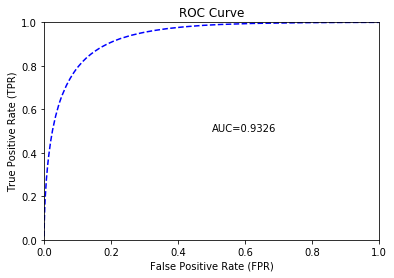

In [12]:
# Gradient Boosting Machine (GBM) - Refinement 2

# GBM hyperparameters
hyper_par    = { 
                 'ntrees' :  [20, 30],
                 'learn_rate' : [0.5],
                 'max_depth' : [20],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5],
                 'col_sample_rate_change_per_level' : [1.7, 2],
                 'min_rows' : [500]
               }

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(seed=my_seed, 
                                                            nfolds=5,
                                                            fold_assignment='Modulo'),
                          grid_id='gbm_grid_2',
                          hyper_params=hyper_par)
gbm_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
gbm_gridperf1 = gbm_grid.get_grid(sort_by='F1', decreasing=True)
print(gbm_gridperf1)

# Grab the top GBM model, chosen by validation F1
best_gbm = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm.model_performance(test)
print(best_gbm_perf1)

best_gbm_perf1.plot()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate_change_per_level col_sample_rate_per_tree learn_rate  \
0                                2.0                      1.0        0.5   

  max_depth min_rows min_split_improvement ntrees sample_rate  \
0        20    500.0                1.0E-5     20         1.0   

            model_ids                  f1  
0  gbm_grid_3_model_0  0.8696212141188748  


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.114135819915
RMSE: 0.337839932386
LogLoss: 0.358042788933
Mean Per-Class Error: 0.14215973227
AUC: 0.932640178265
Gini: 0.86528035653
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.82741449188: 


,0,1,Error,Rate
0,2421430.0,135261.0,0.0529,(135261.0/2556691.0)
1,100193.0,195577.0,0.3388,(100193.0/295770.0)
Total,2521623.0,330838.0,0.0825,(235454.0/2852461.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8274145,0.6242404,68.0
max f2,0.6147445,0.7053589,137.0
max f0point5,0.9139799,0.6490282,37.0
max accuracy,0.9111284,0.9259822,38.0
max precision,0.9963023,0.9886095,0.0
max recall,0.0037820,1.0,399.0
max specificity,0.9963023,0.9999793,0.0
max absolute_mcc,0.8301056,0.5791911,67.0
max min_per_class_accuracy,0.5669180,0.8569429,151.0
max mean_per_class_accuracy,0.5171780,0.8578403,166.0


Gains/Lift Table: Avg response rate: 10,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100001,0.9856276,8.9291135,8.9291135,0.9258545,0.9258545,0.0892924,0.0892924,792.9113472,792.9113472
,2,0.0200003,0.9756310,8.0902975,8.5097055,0.8388782,0.8823663,0.0809041,0.1701964,709.0297474,750.9705473
,3,0.0300001,0.9651598,7.3078616,8.1091002,0.7577479,0.8408278,0.0730771,0.2432735,630.7861590,710.9100208
,4,0.0400002,0.9540144,6.7091756,7.7591160,0.6956705,0.8045382,0.0670927,0.3103662,570.9175606,675.9115990
,5,0.0500003,0.9417711,6.1672078,7.4407321,0.6394741,0.7715251,0.0616729,0.3720391,516.7207832,644.0732126
,6,0.1000003,0.8598304,4.7098099,6.0752758,0.4883574,0.6299418,0.2354904,0.6075295,370.9809948,507.5275824
,7,0.1500003,0.7452376,2.8303759,4.9936451,0.2934800,0.5177881,0.1415187,0.7490482,183.0375946,399.3645059
,8,0.2000003,0.6106378,1.7461547,4.1817739,0.1810578,0.4336057,0.0873077,0.8363560,74.6154718,318.1773897
,9,0.3000002,0.3634843,0.8894752,3.0843423,0.0922292,0.3198136,0.0889475,0.9253034,-11.0524758,208.4342294
,10,0.4000002,0.2009794,0.3866857,2.4099287,0.0400952,0.2498841,0.0386686,0.9639720,-61.3314264,140.9928746


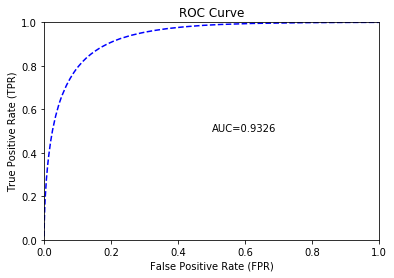

In [9]:
# Gradient Boosting Machine (GBM) - Final

# GBM hyperparameters
hyper_par    = { 
                 'ntrees' :  [20],
                 'learn_rate' : [.5],
                 'max_depth' : [20],
                 'sample_rate' : [1.],
                 'col_sample_rate_per_tree' : [1.],
                 'min_split_improvement' : [1e-5],
                 'col_sample_rate_change_per_level' : [2],
                 'min_rows' : [500]
               }

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(seed=my_seed, 
                                                            nfolds=5,
                                                            fold_assignment='Modulo'),
                          grid_id='gbm_grid_3',
                          hyper_params=hyper_par)
gbm_grid.train(x=features, 
               y='label', 
               training_frame=train)

# Get the grid results, sorted by validation F1-Measure
gbm_gridperf1 = gbm_grid.get_grid(sort_by='F1', decreasing=True)
print(gbm_gridperf1)

# Grab the top GBM model, chosen by validation F1
best_gbm = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm.model_performance(test)
print(best_gbm_perf1)

best_gbm_perf1.plot()

In [14]:
h2o.cluster().shutdown()

H2O session _sid_8d31 closed.
